<a href="https://colab.research.google.com/github/lucasfelipecdm/tech-challenge-fase-2/blob/main/genetic_algorithm_tsp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalando os pacotes necessários para conseguir executar o código dentro do colab

In [1]:
# Install necessary packages
!pip install pygame
!apt-get install -y xvfb
!pip install pyvirtualdisplay

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common
The following NEW packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common xvfb
0 upgraded, 9 newly installed, 0 to remove and 45 not upgraded.
Need to get 7,813 kB of archives.
After this operation, 11.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfontenc1 amd64 1:1.1.4-1build3 [14.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxfont2 amd64 1:2.0.5-1build1 [94.5 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxkbfile1 amd64 1:1.1.0-1build3 [71.8 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 x11-xkb-utils amd64 7.7+5build4 [172 kB]
Get:5 http://archiv

Importando os pacotes

In [2]:
# Import packages
import numpy as np
import random
import pygame
from pyvirtualdisplay import Display
import matplotlib.pyplot as plt
import imageio

pygame 2.6.0 (SDL 2.28.4, Python 3.10.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


Configurando os valores iniciais

In [3]:
# Configurações iniciais
num_cidades = 15
populacao_size = 20
num_geracoes = 50
taxa_mutacao = 0.1
coordenadas = np.random.rand(num_cidades, 2)  # Coordenadas aleatórias em um plano 2D

# Criar matriz de distâncias
distancias = np.sqrt(((coordenadas[:, np.newaxis] - coordenadas[np.newaxis, :]) ** 2).sum(axis=2))

Melhor rota global: [6, 8, 5, 2, 7, 1, 4, 14, 0, 11, 3, 13, 9, 12, 10] com custo: 4.209219196561955


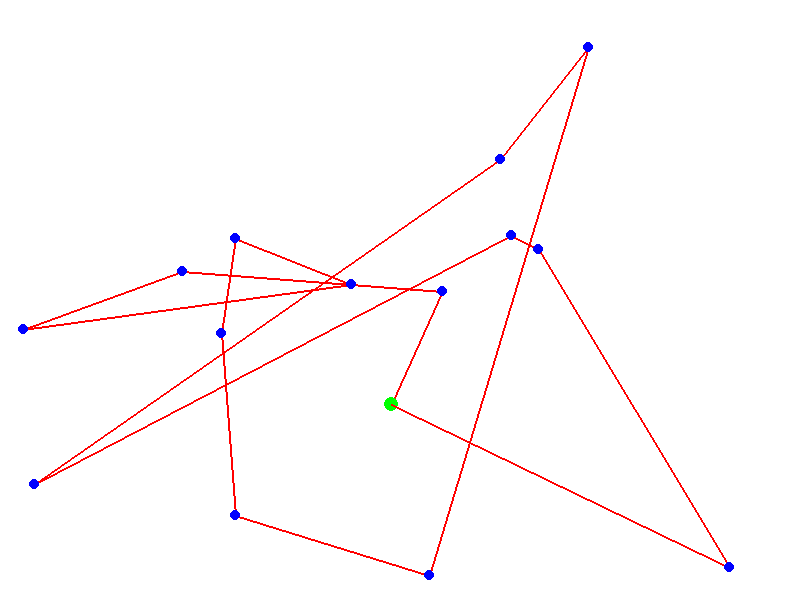

In [4]:
# Função para calcular o custo da rota
def calcular_custo(rota):
    return sum(distancias[rota[i], rota[(i + 1) % len(rota)]] for i in range(len(rota)))

# Função de fitness
def fitness(rota):
    return -calcular_custo(rota)

# Inicializar população
populacao = [random.sample(range(num_cidades), num_cidades) for _ in range(populacao_size)]

# Função de crossover (PMX)
def pmx(parent1, parent2):
    size = len(parent1)
    p1, p2 = [0]*size, [0]*size
    for i in range(size):
        p1[parent1[i]] = i
        p2[parent2[i]] = i
    cx1, cx2 = sorted(random.sample(range(size), 2))
    child1, child2 = parent1[:], parent2[:]
    for i in range(cx1, cx2 + 1):
        temp1, temp2 = child1[i], child2[i]
        child1[i], child1[p1[temp2]] = temp2, temp1
        child2[i], child2[p2[temp1]] = temp1, temp2
        p1[temp1], p1[temp2] = p1[temp2], p1[temp1]
        p2[temp1], p2[temp2] = p2[temp2], p2[temp1]
    return child1, child2

# Função de mutação
def mutar(rota):
    if random.random() < taxa_mutacao:
        i, j = random.sample(range(len(rota)), 2)
        rota[i], rota[j] = rota[j], rota[i]
    return rota

# Selecionar os melhores para reprodução
def selecao(populacao):
    return sorted(populacao, key=fitness, reverse=True)[:2]

# Armazenar as melhores rotas de cada geração
melhores_rotas = []

# Rodar as gerações
for geracao in range(num_geracoes):
    nova_populacao = []
    for _ in range(populacao_size // 2):
        pai1, pai2 = selecao(populacao)
        filho1, filho2 = pmx(pai1, pai2)
        nova_populacao.append(mutar(filho1))
        nova_populacao.append(mutar(filho2))
    populacao = nova_populacao
    melhores_rotas.append(min(populacao, key=calcular_custo))

# Inicializar pygame com display virtual
display = Display(visible=0, size=(800, 600))
display.start()
pygame.init()

# Configurações da tela
largura_tela, altura_tela = 800, 600
tela = pygame.display.set_mode((largura_tela, altura_tela))
pygame.display.set_caption("Algoritmo Genético - TSP")

# Função para desenhar a rota
def desenhar_rota(tela, rota):
    tela.fill((255, 255, 255))  # Limpar tela
    for i in range(len(rota)):
        inicio = coordenadas[rota[i]] * [largura_tela, altura_tela]
        fim = coordenadas[rota[(i + 1) % len(rota)]] * [largura_tela, altura_tela]
        pygame.draw.line(tela, (255, 0, 0), inicio, fim, 2)
        if i == 0:
            pygame.draw.circle(tela, (0, 255, 0), inicio.astype(int), 7)  # Cidade inicial em verde
        else:
            pygame.draw.circle(tela, (0, 0, 255), inicio.astype(int), 5)  # Outras cidades em azul
    pygame.display.flip()

# Salvar frames da animação
frames = []
clock = pygame.time.Clock()
geracao_atual = 0

while geracao_atual < num_geracoes:
    desenhar_rota(tela, melhores_rotas[geracao_atual])
    geracao_atual += 1
    clock.tick(1)  # Atualizar a cada segundo
    # Salvar frame
    frame = pygame.surfarray.array3d(pygame.display.get_surface())
    frames.append(frame.swapaxes(0, 1))

pygame.quit()
display.stop()

# Criar animação com os frames salvos
imageio.mimsave('/content/tsp_genetic_algorithm.gif', frames, fps=1)

# Mostrar a melhor rota no console
melhor_rota_global = min(melhores_rotas, key=calcular_custo)
print(f"Melhor rota global: {melhor_rota_global} com custo: {calcular_custo(melhor_rota_global)}")

# Exibir o GIF no notebook
from IPython.display import Image
Image(filename='/content/tsp_genetic_algorithm.gif')